In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Resampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

# Modeling, Fitting and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

In [182]:
df = pd.read_csv('hotel_bookings.csv',
                      usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']).loc[:5000]
df.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5001 non-null   object 
 1   is_canceled                  5001 non-null   int64  
 2   adults                       5001 non-null   int64  
 3   children                     5001 non-null   float64
 4   babies                       5001 non-null   int64  
 5   meal                         5001 non-null   object 
 6   country                      4999 non-null   object 
 7   market_segment               5001 non-null   object 
 8   distribution_channel         5001 non-null   object 
 9   reserved_room_type           5001 non-null   object 
 10  booking_changes              5001 non-null   int64  
 11  deposit_type                 5001 non-null   object 
 12  days_in_waiting_list         5001 non-null   int64  
 13  customer_type     

In [184]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

Terdapat 2 missing value di country

In [185]:
df.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.459708,1.969806,0.115577,0.014797,0.207159,1.771646,0.093781,0.601880
std,0.498424,1.566170,0.444791,0.122397,0.612435,13.544026,0.292922,0.823206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


In [186]:
df.describe(exclude = 'number')

,hotel,meal,country,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
count,5001,5001,4999,5001,5001,5001,5001,5001
unique,1,5,56,6,3,9,3,4
top,Resort Hotel,BB,PRT,Online TA,TA/TO,A,No Deposit,Transient
freq,5001,3418,3175,2156,3657,3167,4461,3700


### Exploratory Data Analysis

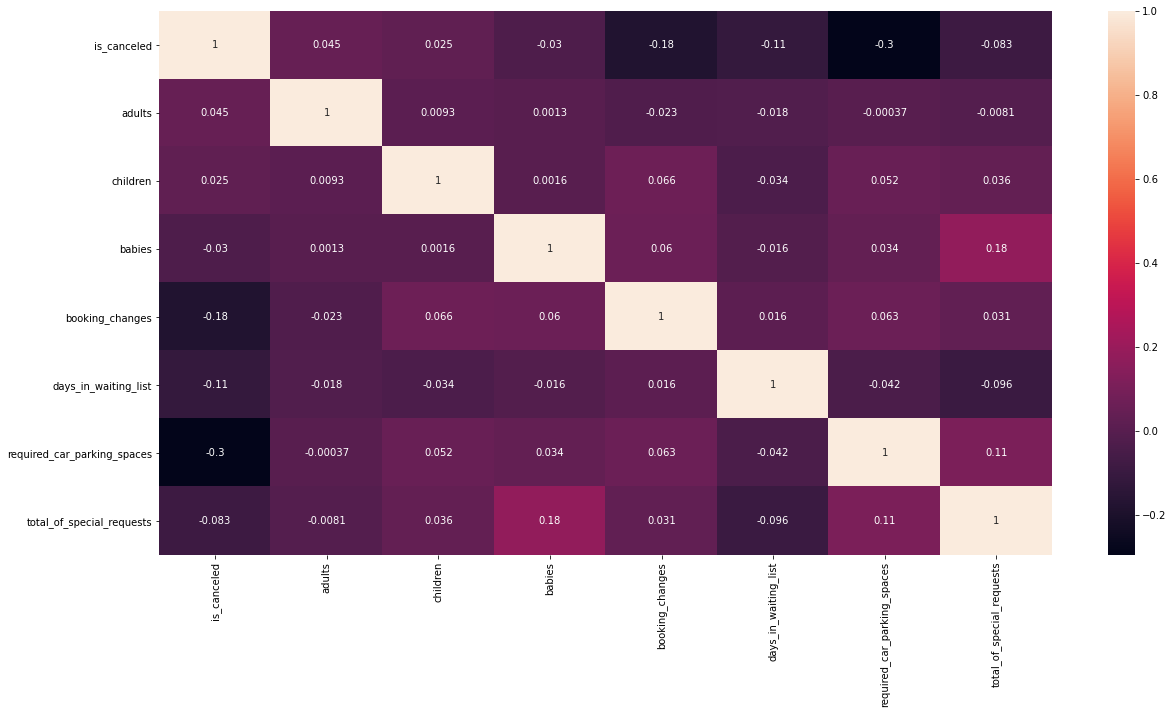

In [187]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot= True)

Dilihat dari korelasinya, data yg memiliki korelasi adalah babies dan total of special request, 
dikarenakan dapat dilihat ketika pengunjung memiliki bayi maka pengunjung akan meminta sesuatu service untuk bayi tersebut

In [231]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_Cancel'] = df[df['is_canceled'] == 0][column].value_counts()
    temp_1['Yes_Cancel'] = df[df['is_canceled'] == 1][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of Visitor')
    plt.title('Distribution of {} and Cancellation'.format(column))
    plt.show()

In [232]:
col_obj= list(df.select_dtypes(['object']))
col_obj

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type']

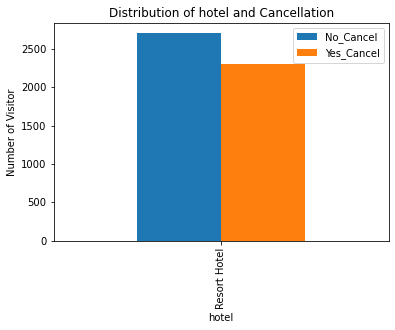

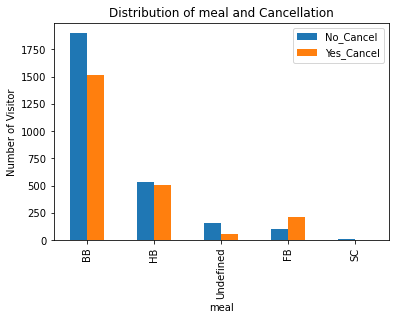

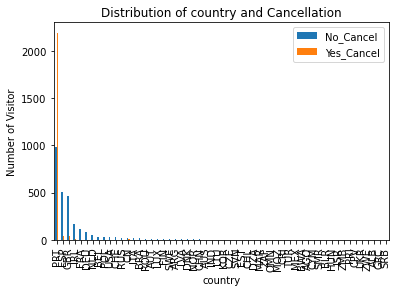

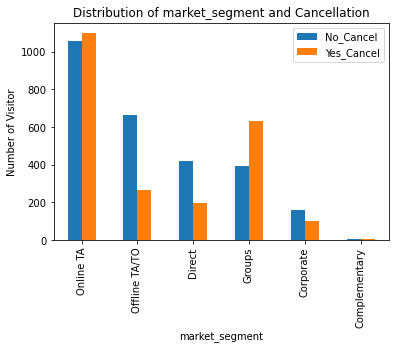

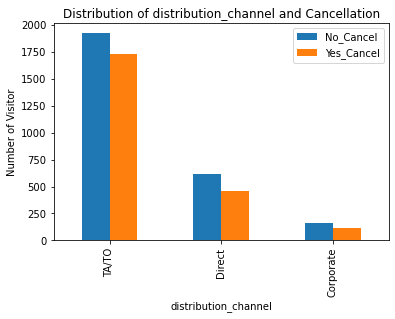

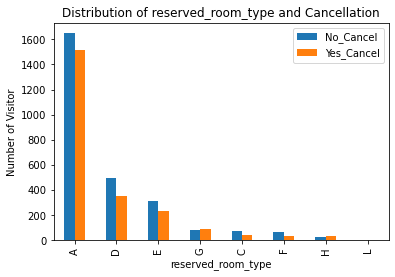

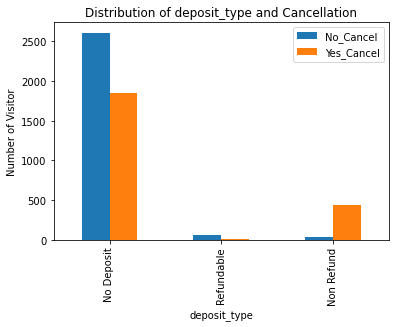

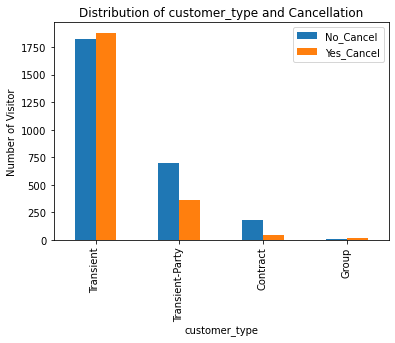

In [233]:
for i in col_obj:
    plot_bar(i)

Kesimpulan:
Hotel X Cancellation:
1. Dari data diatas dapat dilihat no cancel masih lebih tinggi dibandingkan yes cancel, cuman perbandingannya masih cukup besar untuk yes cancel

Meal X Cancellation:
1. Dari data diatas dapat dilihat BB,HB,Undefinded masih lebih tinggi No dibandinkang Yes, tetapi di FB lebih tinggi Yes dibandingkan NO

Country X Cancellation:
1. PRT cukup besar memberikan Yes cancel dibanding country lain   
    
Market Segment X Cancellation:
1. Dapat dilihat bahwa online TA memberikan Yes Cancel yang tinggi, karena mereka lebih mudah untuk melakukan cancel melalui platform aplikasi / website untuk melakukan cancellation
2. Pada groups jg dilihat yes cancelnya lebih tinggi, mungkin yg diprediksi karena jika group melakukan hotel booking, salah satu dari group member tersebut tidak bisa maka akan kemungkinan untuk melakukan cancel
3. Dari Offline TA/TO, Direct, Corporate, lebih besar No, dapat disebabkan kepastian si user untuk melakukan booking di hotel tersebut

Distribution X Channel:
1. Pensupply terbanyak hotel bookings dapat dilihat dari TA/TO, tetapi cukup tinggi jg untuk yes cancelnya walaupun dibandingkan No nya yg masih lebih tinggi
2. Untuk Direct dan Corp, No cancelnya masih cukup tinggi dibandignkan yes

Reservation Room Type X Cancellation:
1. Dilihat bahwa No cancel masih lebih tinggi dibeberapa roomtype kecuali G

Deposit Type X Cancellation
1. Dilihat No Deposit masih cukup tinggi No-nya dibandingkan Yes, tetapi di Non Refund malah lebih tinggi Yesnya

Customer Type x Cancellation
1. Pada transient banyak memberikan yes cancel, karena mereke termasuk pengunjung sementara dan sifatnya mutable
2. Sedangkan di 3 group lain yesnya masih tergolong rendah dibandingkan no

In [223]:
df['is_canceled'].value_counts()/df.shape[0]*100

0    54.029194
1    45.970806
Name: is_canceled, dtype: float64

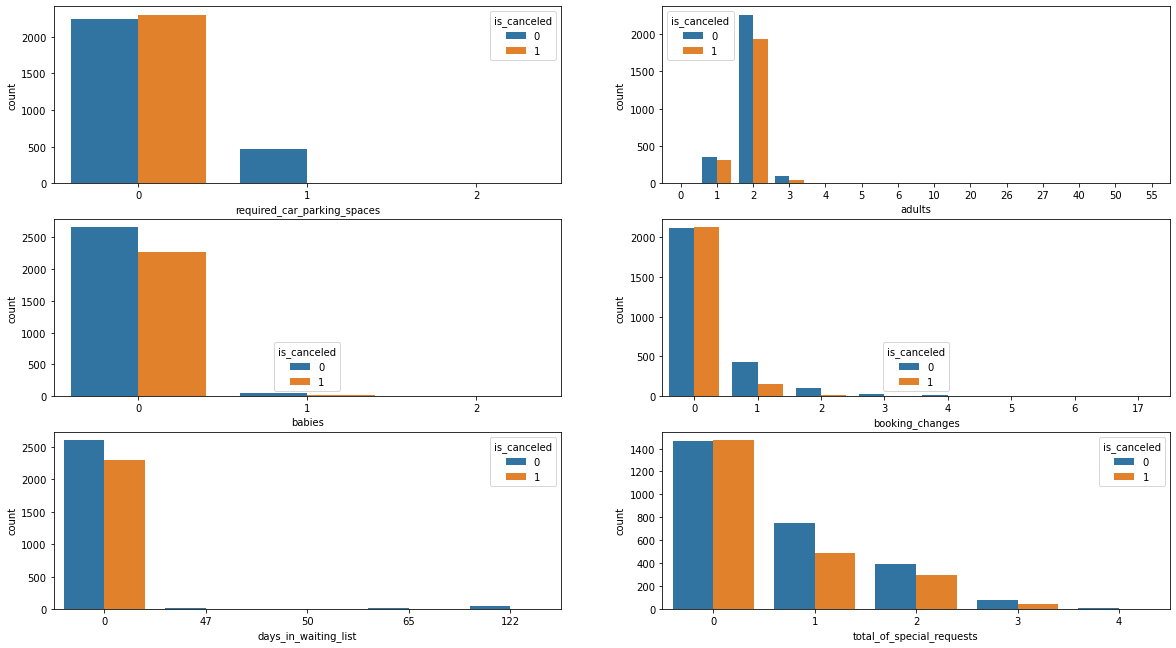

In [234]:
plt.figure(figsize=[20,15])
plt.subplot(421)
sns.countplot(x=df['required_car_parking_spaces'],hue=df['is_canceled'])
plt.subplot(422)
sns.countplot(x=df['adults'],hue=df['is_canceled'])
plt.subplot(423)
sns.countplot(x=df['babies'],hue=df['is_canceled'])
plt.subplot(424)
sns.countplot(x=df['booking_changes'],hue=df['is_canceled'])
plt.subplot(425)
sns.countplot(x=df['days_in_waiting_list'],hue=df['is_canceled'])
plt.subplot(426)
sns.countplot(x=df['total_of_special_requests'],hue=df['is_canceled'])
plt.show()

Kesimpulan:
Car Parking X Cancellation:
1. Dari data diatas dapat dilihat yes cancel cukup tinggi dibandingkan No jika 0 parking spaces

Babies X Cancellation:
1. Dari data diatas babies masih dominan No cancel dibandingkan Yes

Days in waiting list X Cancellation:
1. Dari data diatas days in waiting list masih dominan No cancel dibandingkan Yes

Market total_of_special_request X Cancellation:
1. Dari data diatas total_of_special_request masih dominan No cancel dibandingkan Yes

Booking Changes X Channel:
1. Dari data diatas booking change memiliki yes cancel tertinggi di angka 0, selain itu yes masih dominan

Adults X Cancellation:
1. Dari data diatas adults pun masih lebih tinggi No dibandingkan Yesnya

# Data Cleaning & Preprocessing

* 0 = Tidak Cancel
* 1 = Cancel

        - TN: user cancel booking
        - TP: user tidak cancel booking
        - FP: user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya user tidak membatalkan pesanan.
        - FN: user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan).

Tindakan:
* FP: Salah prediksi, Hotel dapat mengalami kesalahan slot pada kamarnya, dan user bisa-bisa gagal menginap dan kedepannya bisa menurunkan kepercayaan user terhadap hotel dan juga menurunkan rating/review hotel
* FN: Salah prediksi, Hotel Rugi  

- > Yang akan di tekan adalah FP dan FN , maka mencari model dengan nilai F1 yang paling baik

In [170]:
df_model = pd.read_csv('hotel_bookings.csv',
                      usecols = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']).loc[:5000]
df_model.sample()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
1680,Resort Hotel,0,2,0.0,0,BB,PRT,Online TA,TA/TO,A,0,No Deposit,0,Transient,1,0


In [117]:
df_model.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [118]:
df_model.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO'], dtype=object)

In [119]:
df_model.total_of_special_requests.unique()

array([0, 1, 3, 2, 4])

## *Preprocessing Scheme*

- BinaryEncode : 'adults','children','country','babies','market_segment','reserved_room_type','booking_changes','days_in_waiting_list'
- OneHotEncode: 'hotel', 'meal','distribution_channel', 'deposit_type,customer_type','required_car_parking_spaces','total_of_special_requests'


In [120]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [121]:
binary_pipe = Pipeline([('encoder',SimpleImputer(strategy='most_frequent')),
                  ('binary encoder',ce.BinaryEncoder())])

In [122]:
transformer = ColumnTransformer([
    ('binary',binary_pipe,['adults','children','country','babies','market_segment','reserved_room_type','booking_changes','days_in_waiting_list']),
    ('mode_onehot_pipe',mode_onehot_pipe,['hotel', 'meal','distribution_channel', 'deposit_type','customer_type','required_car_parking_spaces','total_of_special_requests'])
    ],remainder='passthrough')

In [123]:
df_model['is_canceled'].value_counts()/df_model.shape[0]*100

0    54.029194
1    45.970806
Name: is_canceled, dtype: float64

> ### *Splitting Data*

In [160]:
X = df_model.drop('is_canceled', axis = 1)
y = df_model['is_canceled']

In [161]:
X.shape

(5001, 15)

Saya memakai 0.3 sebagai default test score dan X.shape untuk randomstate

In [162]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,stratify=y,
    test_size=0.3,
    random_state=1515)

> ### Modelling

> Define Model
> I use 3 models to predict:
> * Logistic Regression
> * Decision Tree Classifier
> * K-Nearest Neighbor

Jelaskan maksud dari tiap-tiap parameter tersebut!
1. LogReg = sebuah model klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.
2. DecTree = suatu model model prediksi menggunakan struktur pohon atau struktur berhirarki.
3. KNN = suatu model yang menggunakan algoritma supervised learning dimana hasil dari instance yang baru diklasifikasikan berdasarkan mayoritas dari kategori k-tetangga terdekat

In [163]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 1515)
knn = KNeighborsClassifier()

In [164]:
from sklearn.metrics import f1_score

In [165]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('knn', knn)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'f1')
tree_pipe_cv = model_evaluation(tree_pipe, 'f1')
knn_pipe_cv = model_evaluation(knn_pipe, 'f1')

for model in [logreg_pipe, tree_pipe, knn_pipe]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std()]
score_f1_score = [f1_score(y_test, logreg_pipe.predict(X_test)),
            f1_score(y_test, tree_pipe.predict(X_test)), 
            f1_score(y_test, knn_pipe.predict(X_test))] 

method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'f1 score': score_f1_score
})
cv_summary

,method,mean score,std score,f1 score
0,Logistic Regression,0.855468,0.009080,0.866667
1,Decision Tree Classifier,0.839127,0.006749,0.857735
2,KNN Classifier,0.825067,0.012528,0.845238


Dari method diatas saya memilih Logistic Regresi,karena memilik highest f1 score, kemudian saya mencoba untuk cek UnderSampling dan OverSampling

# Handling Imbalance

* Under Sampling

In [166]:
rus = RandomUnderSampler(random_state = 1010)
X_under, y_under = rus.fit_resample(X_train, y_train) 

logreg_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('logreg', logreg)])
tree_pipe_under = Pipeline([('transformer', transformer), ('rus', rus), ('tree', tree)])
knn_pipe_under = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('rus', rus), ('knn', knn)])

def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_under_cv = model_evaluation(logreg_pipe_under, 'f1') 
tree_under_cv = model_evaluation(tree_pipe_under, 'f1')
knn_under_cv = model_evaluation(knn_pipe_under, 'f1')

for model in [logreg_pipe_under, tree_pipe_under, knn_pipe_under]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_under_cv.mean(), tree_under_cv.mean(), knn_under_cv.mean(),
              ]
score_std = [logreg_under_cv.std(), tree_under_cv.std(), knn_under_cv.std(),
             ]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std()]
score_f1_score = [f1_score(y_test, logreg_pipe.predict(X_test)),
            f1_score(y_test, tree_pipe.predict(X_test)), 
            f1_score(y_test, knn_pipe.predict(X_test))] 

method_name = ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling',
              'KNN Classifier UnderSampling']
under_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'f1 score': score_f1_score
})
under_summary

,method,mean score,std score,f1 score
0,Logistic Regression UnderSampling,0.855468,0.009080,0.859385
1,Decision Tree Classifier UnderSampling,0.839127,0.006749,0.854422
2,KNN Classifier UnderSampling,0.825067,0.012528,0.835443


Ketika Under Sampling semua model malah turun, tetapi yg paling baik masih LogisticRegresion

* Over Sampling

In [167]:
ros = RandomOverSampler(random_state = 1010)
X_over, y_over = ros.fit_resample(X_train, y_train) 

logreg_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('logreg', logreg)])
tree_pipe_over = Pipeline([('transformer', transformer), ('ros', ros), ('tree', tree)])
knn_pipe_over = Pipeline([('transformer', transformer), ('scale', MinMaxScaler()), ('ros', ros), ('knn', knn)])


def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

logreg_over_cv = model_evaluation(logreg_pipe_over, 'f1') 
tree_over_cv = model_evaluation(tree_pipe_over, 'f1')
knn_over_cv = model_evaluation(knn_pipe_over, 'f1')


for model in [logreg_pipe_over, tree_pipe_over, knn_pipe_over]:
    model.fit(X_train, y_train)
    
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std()]
score_f1_score = [f1_score(y_test, logreg_pipe.predict(X_test)),
            f1_score(y_test, tree_pipe.predict(X_test)), 
            f1_score(y_test, knn_pipe.predict(X_test))] 

method_name = ['Logistic Regression OverSampling', 'Decision Tree Classifier OverSampling',
              'KNN Classifier OverSampling']

over_summary = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'f1 score': score_f1_score
})
over_summary

,method,mean score,std score,f1 score
0,Logistic Regression OverSampling,0.855468,0.009080,0.860892
1,Decision Tree Classifier OverSampling,0.839127,0.006749,0.857529
2,KNN Classifier OverSampling,0.825067,0.012528,0.825589


Ketika Over Sampling semua model mengalami perubahan, tetapi yg paling baik masih LogisticRegresion

Dari 3 Metode, CrossVal, UnderSamp, dan OverSamp, saya memilih LogReg

# HyperParam Tuning

In [168]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)
])

hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['liblinear', 'newton-cg']
}

random = RandomizedSearchCV(
                estimator,
                param_distributions = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'f1',
                n_iter = 10,
                n_jobs = -1)

random.fit(X_train, y_train)

print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.8560324427657445
best param {'model__solver': 'newton-cg', 'model__C': 1}


Model_C = nilai yang lebih kecil menentukan regularisasi yang lebih kuat.

model_solver = Algoritma yang akan digunakan dalam masalah pengoptimalan. 

Setelah HyperParameter tuning , f1 score malah menurun dengan model solver newton-cg dan C score = 1

In [157]:
random.best_estimator_.fit(X_train, y_train)
y_predict = random.best_estimator_.predict(X_test)
f1_score(y_test, y_predict)

0.8659106070713809

Dapat dilihat bahwa hasil dari crossvalidasi masih tinggi setelah di handling imbalance maupun di hyperparam tuning

## Kesimpulan
> * Dapat dilihat bahwa model LogRegresi menghasilkan nilai tertinggi dari beberapa model
> * Dilihat jg setelah dihyperparam tuning f1 score malah menurun dari 0.866667 menjadi 0.8659106070713809